<a href="https://colab.research.google.com/github/fajarkhalid/Data-Science-and-Analytics/blob/main/20SW049_lab05_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#task1
import pandas as pd

# Create a Pandas Series that contains the distance of some planets from the Sun.
distance_from_sun = [149.6, 1433.5, 227.9, 108.2, 778.6]
planets = ['Earth', 'Saturn', 'Mars', 'Venus', 'Jupiter']

# Create a Pandas Series using the above data, with the name of the planets as
# the index and the distance from the Sun as your data.
dist_planets = pd.Series(distance_from_sun, index=planets)

# Calculate the number of minutes it takes sunlight to reach each planet.
# Speed of light in units of 10^6 km/minute
speed_of_light = 18
time_light = dist_planets / speed_of_light

# Use Boolean indexing to select only those planets for which sunlight takes less
# than 40 minutes to reach them.
close_planets = dist_planets[time_light < 40]

print("Distances from Sun:")
print(dist_planets)
print("\nTime for sunlight to reach each planet:")
print(time_light)
print("\nPlanets where sunlight takes less than 40 minutes:")
print(close_planets)


Distances from Sun:
Earth       149.6
Saturn     1433.5
Mars        227.9
Venus       108.2
Jupiter     778.6
dtype: float64

Time for sunlight to reach each planet:
Earth       8.311111
Saturn     79.638889
Mars       12.661111
Venus       6.011111
Jupiter    43.255556
dtype: float64

Planets where sunlight takes less than 40 minutes:
Earth    149.6
Mars     227.9
Venus    108.2
dtype: float64


In [ ]:
#task2
import pandas as pd
import numpy as np

# Since we will be working with ratings, we will set the precision of our
# dataframes to one decimal place.
pd.set_option('display.precision', 1)

# Create a Pandas DataFrame that contains the ratings some users have given to a
# series of books. The ratings given are in the range from 1 to 5, with 5 being
# the best score. The names of the books, the authors, and the ratings of each user
# are given below:
books = pd.Series(data=['Great Expectations', 'Of Mice and Men', 'Romeo and Juliet', 'The Time Machine', 'Alice in Wonderland'])
authors = pd.Series(data=['Charles Dickens', 'John Steinbeck', 'William Shakespeare', ' H. G. Wells', 'Lewis Carroll'])
user_1 = pd.Series(data=[3.2, np.nan, 2.5])
user_2 = pd.Series(data=[5., 1.3, 4.0, 3.8])
user_3 = pd.Series(data=[2.0, 2.3, np.nan, 4])
user_4 = pd.Series(data=[4, 3.5, 4, 5, 4.2])

# Create a dictionary with the data given above
dat = {'Author': authors, 'Book Title': books, 'User 1': user_1, 'User 2': user_2, 'User 3': user_3, 'User 4': user_4}

# Use the dictionary to create a Pandas DataFrame
book_ratings = pd.DataFrame(dat)

# Now replace all the NaN values in your DataFrame with the average rating in each column.
# Replace the NaN values in place.
average_ratings = book_ratings.mean()
book_ratings.fillna(average_ratings, inplace=True)

# Print the resulting DataFrame
print(book_ratings)



                Author           Book Title  User 1  User 2  User 3  User 4
0      Charles Dickens   Great Expectations     3.2     5.0     2.0     4.0
1       John Steinbeck      Of Mice and Men     2.9     1.3     2.3     3.5
2  William Shakespeare     Romeo and Juliet     2.5     4.0     2.8     4.0
3          H. G. Wells     The Time Machine     2.9     3.8     4.0     5.0
4        Lewis Carroll  Alice in Wonderland     2.9     3.5     2.8     4.2


<ipython-input-19-ca5140bc3be0>:28: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_ratings = book_ratings.mean()


# Statistics from Stock Data

In this lab we will load stock data into a Pandas Dataframe and calculate some statistics on it. We will be working with stock data from Google, Apple, and Amazon. All the stock data was downloaded from yahoo finance in CSV format. In your workspace you should have a file named GOOG.csv containing the Google stock data, a file named AAPL.csv containing the Apple stock data, and a file  named AMZN.csv containing the Amazon stock data. (You can see the workspace folder by clicking on the Jupyter logo in the upper left corner of the workspace.) All the files contain 7 columns of data:

**Date Open High Low Close Adj_Close Volume**

We will start by reading in any of the above CSV files into a DataFrame and see what the data looks like.

In [ ]:
# We import pandas into Python
import pandas as pd

# We read in a stock data data file into a data frame and see what it looks like
df = pd.read_csv('./GOOG.csv')

# We display the first 5 rows of the DataFrame
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


We clearly see that the Dataframe is has automatically labeled the row indices using integers and has labeled the columns of the DataFrame using the names of the columns in the CSV files.

# To Do

You will now load the stock data from Google, Apple, and Amazon into separte DataFrames. However, for each stock data you will only be interested in loading the `Date` and `Adj Close` columns into the Dataframe. In addtion, you want to use the `Date` column as your row index. Finally, you want the DataFrame to recognize the dates as actual dates (year/month/day) and not as strings. For each stock, you can accomplish all theses things in just one line of code by using the appropiate keywords in the `pd.read_csv()` function. Here are a few hints:

* Use the `index_col` keyword to indicate which column you want to use as an index. For example `index_col = ['Open']`

* Set the `parse_dates` keyword equal to `True` to convert the Dates into real dates of the form year/month/day

* Use the `usecols` keyword to select which columns you want to load into the DataFrame. For example `usecols = ['Open', 'High']`

Fill in the code below:

In [ ]:
import pandas as pd

# Load Google stock data
google_stock = pd.read_csv('GOOG.csv', usecols=['Date', 'Adj Close'], index_col='Date', parse_dates=True)

# Load Apple stock data
apple_stock = pd.read_csv('AAPL.csv', usecols=['Date', 'Adj Close'], index_col='Date', parse_dates=True)

# Load Amazon stock data
amazon_stock = pd.read_csv('AMZN.csv', usecols=['Date', 'Adj Close'], index_col='Date', parse_dates=True)


You can check that you have loaded the data correctly by displaying the head of the DataFrames.

In [ ]:
# We display the google_stock DataFrame
google_stock.head()

,Adj Close
Date,
2004-08-19,49.845802
2004-08-20,53.805050
2004-08-23,54.346527
2004-08-24,52.096165
2004-08-25,52.657513


You will now join the three DataFrames above to create a single new DataFrame that contains all the `Adj Close` for all the stocks. Let's start by creating an empty DataFrame that has as row indices calendar days between `2000-01-01`  and `2016-12-31`. We will use the `pd.date_range()` function to create the calendar dates first and then we will create a DataFrame that uses those dates as row indices:

In [ ]:
# We create calendar dates between '2000-01-01' and  '2016-12-31'
dates = pd.date_range('2000-01-01', '2016-12-31')

# We create and empty DataFrame that uses the above dates as indices
all_stocks = pd.DataFrame(index = dates)

# To Do

You will now join the the individual DataFrames, `google_stock`, `apple_stock`, and `amazon_stock`, to the `all_stocks` DataFrame. However, before you do this, it is necessary that you change the name of the columns in each of the three dataframes. This is because the column labels in the `all_stocks` dataframe must be unique. Since all the columns in the individual dataframes have the same name, `Adj Close`, we must change them to the stock name before joining them. In the space below change the column label `Adj Close` of each individual dataframe to the name of the corresponding stock. You can do this by using the `pd.DataFrame.rename()` function.

In [ ]:
# Change the Adj Close column label to Google
google_stock = google_stock.rename(columns={'Adj Close': 'Google'})

# Change the Adj Close column label to Apple
apple_stock = apple_stock.rename(columns={'Adj Close': 'Apple'})

# Change the Adj Close column label to Amazon
amazon_stock = amazon_stock.rename(columns={'Adj Close': 'Amazon'})


You can check that the column labels have been changed correctly by displaying the datadrames

In [ ]:
# We display the google_stock DataFrame
google_stock.head()

,Google
Date,
2004-08-19,49.845802
2004-08-20,53.805050
2004-08-23,54.346527
2004-08-24,52.096165
2004-08-25,52.657513


Now that we have unique column labels, we can join the individual DataFrames to the `all_stocks` DataFrame. For this we will use the `dataframe.join()` function. The function `dataframe1.join(dataframe2)` joins `dataframe1` with `dataframe2`. We will join each dataframe one by one to the `all_stocks` dataframe. Fill in the code below to join the dataframes, the first join has been made for you:

In [ ]:
# We join the Google stock to all_stocks
all_stocks = all_stocks.join(google_stock)

# We join the Apple stock to all_stocks
all_stocks = all_stocks.join(apple_stock)

# We join the Amazon stock to all_stocks
all_stocks = all_stocks.join(amazon_stock)


You can check that the dataframes have been joined correctly by displaying the `all_stocks`  dataframe

In [ ]:
# We display the google_stock DataFrame
all_stocks.head()

,Google,Apple,Amazon
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,NaN,3.596616,89.3750
2000-01-04,NaN,3.293384,81.9375
2000-01-05,NaN,3.341579,69.7500


# To Do

Before we proceed to get some statistics on the stock data, let's first check that we don't have any *NaN* values. In the space below check if there are any *NaN* values in the `all_stocks`  dataframe. If there are any, remove any rows that have *NaN* values:

In [ ]:
# Check if there are any NaN values in the all_stocks dataframe


# Remove any rows that contain NaN values


Now that you have eliminated any *NaN* values we can now calculate some basic statistics on the stock prices. Fill in the code below

In [ ]:
# Print the average stock price for each stock

# Print the median stock price for each stock

# Print the standard deviation of the stock price for each stock

# Print the correlation between stocks

We will now look at how we can compute some rolling statistics, also known as moving statistics. We can calculate for example the rolling mean (moving average) of the Google stock price by using the Pandas `dataframe.rolling().mean()` method. The `dataframe.rolling(N).mean()` calculates the rolling mean over an `N`-day window. In other words, we can take a look at the average stock price every `N`  days using the above method. Fill in the code below to calculate the average stock price every 150 days for Google stock

In [ ]:
# We compute the rolling mean using a 150-Day window for Google stock
rollingMean = google_stock['Google'].rolling(window=150).mean()


We can also visualize the rolling mean by plotting the data in our dataframe. In the following lessons you will learn how to use **Matplotlib** to visualize data. For now I will just import matplotlib and plot the Google stock data on top of the rolling mean. You can play around by changing the rolling mean window and see how the plot changes.

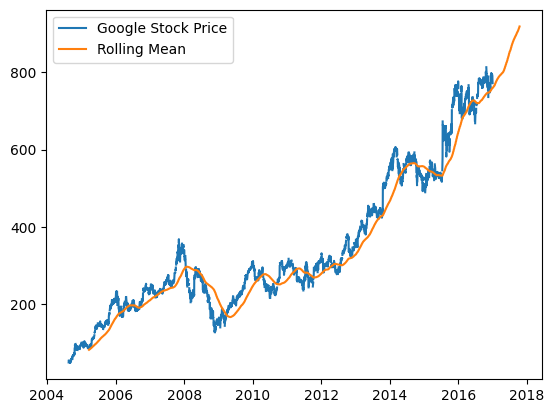

In [ ]:
# this allows plots to be rendered in the notebook
%matplotlib inline

# We import matplotlib into Python
import matplotlib.pyplot as plt


# We plot the Google stock data
plt.plot(all_stocks['Google'])

# We plot the rolling mean ontop of our Google stock data
plt.plot(rollingMean)
plt.legend(['Google Stock Price', 'Rolling Mean'])
plt.show()